# Lab 5: Clustering and Linear Regression

## Name: Abhay Narayanan (abhayn2)

## Due:  October 9, 2017 11:59 PM 

### Logistics

See Canvas

### What You Will Need to Know For This Lab

* K-means clustering
* Vector Quantization
* Nearest Neighbors Classification
* Linear Regression

### Preamble (don't change this)

In [250]:
%pylab inline
import numpy as np
from sklearn import neighbors
from numpy import genfromtxt
import scipy.spatial.distance as dist
import random
from sklearn.cluster import KMeans
from PIL import Image
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Problem 1: Selecting the number of clusters (30 points)

Write a function which implements K-means clustering. 

You will be given as input:
* A $(N,d)$ numpy.ndarray of unlabeled data (with each row as a feature vector), data
* A scalar $K$ which indicates the number of clusters
* A scalar representing the number of iterations, niter (this is your stopping criterion/criterion for convergence)

Your output will be a tuple consisting of a vector of length N containing which cluster ($0,\ldots,K-1$) a feature vector is in and a $(K,d)$ matrix with the rows containing the cluster centers. 

Do not use scikit-learn or similar for implement K-means clustering. You may use `scipy.spatial.distance.cdist` to calculate distances. Initialize the centers randomly without replacement with points from the data set. `random.sample` may be useful for this. <b>(10 points)</b>

In [73]:
def kMeans(data,K,niter):
    #Put your code here
    temp = np.size(data, 1)
    temp1 = np.size(data, 0)
    centers = data[np.random.choice(data.shape[0],K,replace = False)]
    clusters = np.zeros(temp1)
    
    for bleh in range(niter):
        disti = dist.cdist(data, centers, 'euclidean')
        clusters = np.argmin(disti,axis = 1)
        
        for a in range(K):    
            tempcenters = np.zeros(temp)
            cluster_count = 0
            
            for bl in range(temp1):
                if (a == clusters[bl]): 
                    tempcenters = tempcenters + data[bl]
                    cluster_count = cluster_count + 1
                    
            centers[a] = tempcenters / cluster_count
    
    return clusters, centers

The K-means clustering problem tries to minimize the following quantity by selecting $\{z_i\}_{i=1}^N$ and $\{\mu_k\}_{k=1}^K$:
$$J_K(\{z_i\}_{i=1}^N ,\{\mu_k\}_{k=1}^K)=\sum_{i=1}^N \lVert \mathbf{x}_i - \mathbf{\mu}_{z_i} \rVert^2$$
where $\mathbf{\mu}_{z_i}$ is the center of the cluster to which $\mathbf{x}_i$ is assigned.

One visual heuristic to choose the number of clusters from the data (where the number of clusters is not known a priori) is to estimate the optimal value of $J_K(\{z_i\}_{i=1}^N ,\{\mu_k\}_{k=1}^K)$, $J^*(K)$ , for different values of $K$ and look for an "elbow" or "knee" in the curve of $J^*$ versus $K$ and choose that value of $K$. 

In this part of the problem, you will run $K$-means 100 times for each $K=2,\ldots,10$ and calculate $J_K(\{z_i\}_{i=1}^N ,\{\mu_k\}_{k=1}^K)$ for the clustering given by $K$-means. Use the smallest value of $J_K(\{z_i\}_{i=1}^N ,\{\mu_k\}_{k=1}^K)$ in the runs of $K$-means for each value of $K$ to form an estimate of $J^*(K)$. Plot this estimate versus $K$. Which $K$ should you pick by this heuristic? Use niter=100 for each run of $K$-means.

For an attempt to formalize this heuristic, see Tibshirani, Robert, Guenther Walther, and Trevor Hastie. "Estimating the number of clusters in a data set via the gap statistic." Journal of the Royal Statistical Society: Series B (Statistical Methodology) 63.2 (2001): 411-423. Sometimes, an elbow does not exist in the curve or there are multiple elbows or the $K$ value of an elbow cannot be unambiguously identified. Further material can be found on <a href="http://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_Elbow_Method">Wikipedia</a> as well.  

Note: Your code should be relatively quick -- a few minutes, at worst. <b>(10 points)</b>

In [74]:
# Load up some data, which we will store in a variable called problem1
problem1= genfromtxt('problem1.csv', delimiter=',')

J(K) =  781.5153410701863 for K = 2
J(K) =  316.00194126182464 for K = 3
J(K) =  123.36918513898152 for K = 4
J(K) =  88.92261634060591 for K = 5
J(K) =  76.40517654004799 for K = 6
J(K) =  67.20502973866446 for K = 7
J(K) =  59.47168683350193 for K = 8
J(K) =  54.145258164847434 for K = 9
J(K) =  49.49043205885948 for K = 10


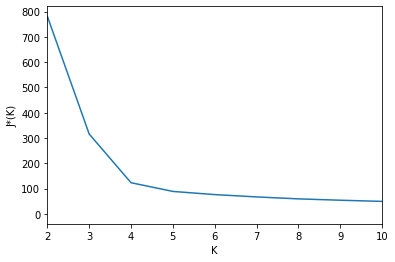

In [81]:
# Put your code here
JKval = 99999*np.ones(11)
JKval[0] = 0
JKval[1] = 0

for K in range(2, 11):
    for i in range(100):
        clusters, centers = kMeans(problem1, K, 100)
        new = 0
        for yay in range(K):             
            Kmeans_distances = dist.cdist(problem1, np.array([centers[yay]]), 'sqeuclidean')
           
            for blue in range(np.size(clusters)):
                if (yay == clusters[blue]):
                    new = new + Kmeans_distances[blue][0]
        if (new < JKval[K]):
            JKval[K] = new
    print("J(K) = ", JKval[K], "for K =", K)
    
    
    
plt.plot(JKval)
plt.xlabel('K')
plt.xlim(2, 10) 
plt.ylabel('J*(K)')
plt.show()

By this heuristic, I should choose K = 4, as it is the "elbow" of the graph, which is where J(K) stops decreasing at such a rapid rate. Increasing the number of clusters from this value is no longer as useful.

Using the value of $K$ you determined from the elbow, perform K-means clustering on the data. 
Plot it as a scatter plot with the colors given by the labels. <b>(5 points)</b>

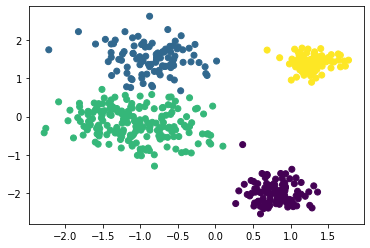

In [87]:
#Put your code here
K = 4
iterations = 100
plotres = kMeans(problem1, K, iterations)

plt.scatter(problem1[:,0],problem1[:,1],c = plotres[0])

Should you pick the $K$ such that $J^*(K)$ is minimized? Why or why not? <b>(5 points)</b>

No, a value of K such that J*(K) is minimized would be far more clusters than the value given by the elbow, which is the value that gives us clearly identifiable clusters around a reasonable number of means. Higher values of K, which would be where it is minimized would result in overfitting, or having far too many clusters, which would not provide any intuitive meaning. 

### Problem 2: Vector Quantization (40 points)

In this problem, you will implement vector quantization. You will use `sklearn.cluster.KMeans` for the K-means implementation and use k-means++ as the initialization method.

Write a function to generate a codebook for vector quantization. You will be given inputs:
* A $(N,M)$ numpy.ndarray representing a greyscale image, called image. (If we want to generate our codebook from multiple images, we can concatenate the images before running them through this function).
* A scalar $B$, for which you will use $B \times B$ blocks for vector quantization. You may assume $N$ and $M$ are divisible by $B$.
* A scalar $K$, which is the size of your codebook

You will return:
* The codebook as a $(K,B^2)$ numpy.ndarray. 
<b>(10 points)</b>

In [211]:
def trainVQ(image,B,K):
    # Put your code here
    N = image.shape[0]
    M = image.shape[1]
    alpha = np.split(np.array(np.split(image, M/B,axis = 1)).reshape(-1,B),(N*M)/(B*B), axis = 0)
    alpha = np.array([x.flatten() for x in alpha])
    
    Alg = KMeans(n_clusters= K).fit(alpha)
    return(Alg.cluster_centers_) #codebook

Write a function which compresses an image against a given codebook. You will be given inputs:
* A $(N,M)$ numpy.ndarray representing a greyscale image, called image. You may assume $N$ and $M$ are divisible by $B$.
* A $(K,B^2)$ codebook called codebook
* $B$

You will return:
* A $(N/B,M/B)$ numpy.ndarray consisting of the indices in the codebook used to approximate the image. 

You can use the nearest neighbor classifier from scikit-learn if you want (though it is not necessary) to map blocks to their nearest codeword. <b>(10 points)</b>

In [212]:
def compressImg(image, codebook,B):
    #Put your code here
    N = image.shape[0]
    M = image.shape[1]
    beta = np.split(np.array(np.split(image, M/B, axis = 1)).reshape(-1, B), (N*M)/(B*B), axis = 0)
    beta = np.array([x.flatten() for x in beta])
    
    Alg1 = NearestNeighbors(n_neighbors =1, algorithm = 'kd_tree')
    Alg1.fit(codebook)
    
    x = np.resize(Alg1.kneighbors(beta,return_distance = False),(int(M/B), int(N/B)))
    arr_ind = x.T
    
    return arr_ind

Write a function to reconstruct an image from its codebook. You will be given inputs:
* A $(N/B,M/B)$ numpy.ndarray containing the indices of the codebook for each block called indices
* A codebook as a $(K,B^2)$ numpy.ndarray called codebook
* $B$

You will return a $(N,M)$ numpy.ndarray representing the image. <b>(10 points)</b>

In [213]:
def decompressImg(indices, codebook,B):
    #Put your code here
    gamma = np.array([x.reshape(-1, B) for x in [x for x in np.array([codebook[x] for x in indices.T.flatten()])]])
    gamma = np.split(gamma.reshape(-1, B), indices.shape[1], axis = 0)
    
    arr_img = np.hstack([x for x in gamma])
    
    return arr_img

Run your vector quantizer with $5 \times 5$ blocks on the provided image with codebook sizes $K=2,5,10,20,50,100,200$ (i.e. generate codebooks from this image of those sizes, compress the image using those codebooks and reconstruct the images). Display and comment on the reconstructed images (you may be quantitative (e.g. PSNR) or qualitative). Which code book would you pick? Why? Make sure to take into account the bits per pixel used by the compressor.

Note the number of bits per pixel can be approximated as $\frac{\log_2 K}{25}$ and the codebook takes approximately $200K$ bits (assuming each pixel is stored as 8 bits). Some good ideas on quantitative arguments for codebook size can be found in Gonzalez & Woods, Digital Image Processing 3e or Gersho & Gray, Signal Compression & Vector Quantization. It is not necessary to look at these references for quantitative arguments, though. <b>(10 points)</b>

The image used is under fair use from [Bleacher Report](http://bleacherreport.com/articles/2688697-tom-brady-comments-on-friendship-with-matt-ryan-ahead-of-super-bowl-51).

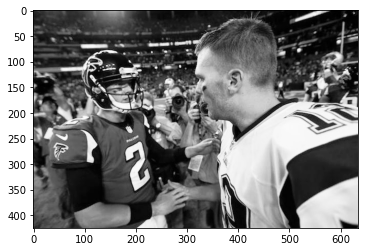

In [219]:
# The provided image is stored in image
image = np.asarray(Image.open("mrtb.jpg").convert("L"))
imshow(image, cmap = cm.Greys_r)

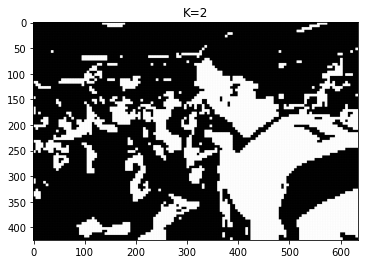

Codebook takes 400 bits
0.04 bits/pixel


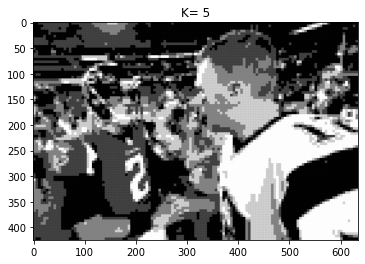

Codebook takes 1000 bits
0.09287712379549448 bits/pixel


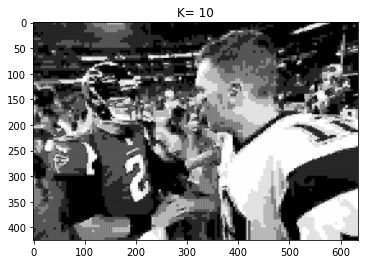

Codebook takes 2000 bits
0.1328771237954945 bits/pixel


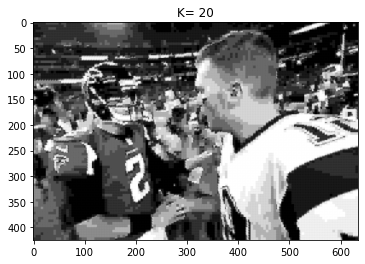

Codebook takes 4000 bits
0.1728771237954945 bits/pixel


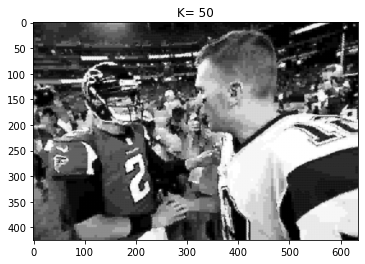

Codebook takes 10000 bits
0.22575424759098897 bits/pixel


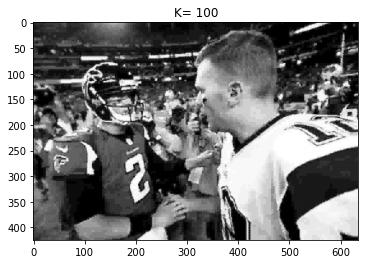

Codebook takes 20000 bits
0.265754247590989 bits/pixel


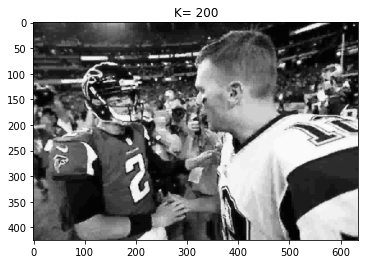

Codebook takes 40000 bits
0.30575424759098896 bits/pixel


In [220]:
#Put your code here
plt.figure()
plt.title("K=2")
cmp = compressImg(image, trainVQ(image, 5, 2), 5)
dcmp = decompressImg(cmp, codebook, 5)
imshow(dcmp, cmap = cm.Greys_r)
plt.show()
print("Codebook takes", 200*2, "bits")
print(math.log2(2)/25, "bits/pixel")



plt.title("K= 5")
codebook = trainVQ(image, 5, 5)
cmp1 = compressImg(image, codebook, 5)
dcmp1 = decompressImg(cmp1, codebook, 5)
imshow(dcmp1, cmap = cm.Greys_r)
plt.show()
print("Codebook takes", 200*5, "bits")
print(math.log2(5)/25, "bits/pixel")



plt.title("K= 10")
codebook = trainVQ(image, 5, 10)
cmp2 = compressImg(image, codebook, 5)
dcmp2 = decompressImg(cmp2, codebook, 5)
imshow(dcmp2, cmap = cm.Greys_r)
plt.show()
print("Codebook takes", 200*10, "bits")
print(math.log2(10)/25, "bits/pixel")



plt.title("K= 20")
codebook = trainVQ(image, 5, 20)
cmp3 = compressImg(image, codebook, 5)
dcmp3 = decompressImg(cmp3, codebook, 5)
imshow(dcmp3, cmap = cm.Greys_r)
plt.show()
print("Codebook takes", 200*20, "bits")
print(math.log2(20)/25, "bits/pixel")



plt.title("K= 50")
codebook = trainVQ(image, 5, 50)
cmp4 = compressImg(image, codebook, 5)
dcmp4 = decompressImg(cmp4, codebook, 5)
imshow(dcmp4, cmap = cm.Greys_r)
plt.show()
print("Codebook takes", 200*50, "bits")
print(math.log2(50)/25, "bits/pixel")



plt.title("K= 100")
codebook = trainVQ(image, 5, 100)
cmp5 = compressImg(image, codebook, 5)
dcmp5 = decompressImg(cmp5, codebook, 5)
imshow(dcmp5, cmap = cm.Greys_r)
plt.show()
print("Codebook takes", 200*100, "bits")
print(math.log2(100)/25, "bits/pixel")



plt.title("K= 200")
codebook = trainVQ(image, 5, 200)
cmp6 = compressImg(image, codebook, 5)
dcmp6 = decompressImg(cmp6, codebook, 5)
imshow(dcmp6, cmap = cm.Greys_r)
plt.show()
print("Codebook takes", 200*200, "bits")
print(math.log2(200)/25, "bits/pixel")


Clearly, as the codebook size increases, there is an improvement in the resolution, meaning the image looks closer and closer to the original. I would choose K = 100 as my choice as the bits/pixel values above this value increase at a slower rate than it did until K = 100. This means that the cost of improving resolution beyond this point is starting to get high, which means K = 100 is the perfect point due to diminishing returns at higher values.

### Problem 3: Linear Regression (35 points)

In this problem, you will do model selection for linear regression using Ordinary Least Squares, Ridge Regression and the LASSO.

The dataset you will use has 8 features:

    lcavol - log cancer volume
    lcaweight - log prostate weight
    age
    lbph - log of amount of benign prostatic hyperplasia
    svi - seminal vesicle invasion
    lcp - log capsular penetration
    gleason - Gleason score
    pgg45 - percent of Gleason scores 4 or 5

and you will predict the level of a prostate-specific antigen. The data set was collected from a set of men about to receive a radical prostatectomy. More details about this dataset are given in Section 3.2.1 in Elements of Statistical Learning 2e by Hastie et al.

In [221]:
# Load the data
trainp= genfromtxt('trainp.csv', delimiter=',')

# Training data: 
trainfeat=trainp[:,:-1] #Training features (rows are feature vectors)
trainresp=trainp[:,-1] #Training responses

valp= genfromtxt('valp.csv',delimiter=',')
# Validation data:
valfeat=valp[:,:-1] #Validation Features (rows are feature vectors)
valresp=valp[:,-1] #Validation Response

# Standardize and center the features
ftsclr=StandardScaler()
trainfeat = ftsclr.fit_transform(trainfeat)
valfeat= ftsclr.transform(valfeat)
# and the responses 
rsclr=StandardScaler()
trainresp = (rsclr.fit_transform(trainresp.reshape(-1,1))).reshape(-1)
valresp= (rsclr.transform(valresp.reshape(-1,1))).reshape(-1)

# The training features are in trainfeat
# The training responses are in trainresp
# The validation features are in valfeat
# The validation responses are in valresp

Since we centered the responses, we can begin with a benchmark model: Always predict the response as zero (mean response on the training data). Calculate the validation RSS for this model. **(5 points)**

If another model does worse than this, it is a sign that something is amiss.

Note: The RSS on a data set with $V$ samples is given by $\frac{1}{V} \lVert \mathbf{y} - \hat{\mathbf{y}} \rVert^2$ where $\mathbf{y}$ is a vector of the responses, and $\hat{\mathbf{y}}$ is the predicted responses on the data.

In [240]:
# Put your code here
predzero = np.zeros(len(valresp))
diff = predzero-valresp

#print(np.dot(diff,diff))
RSS = np.dot(diff, diff)/len(valresp)


print("Validation RSS = ", RSS)

Validation RSS =  0.733852091912677


Validation RSS = 0.733852091912677

First, you will try (Ordinary) Least Squares. Use `sklearn.linear_model.LinearRegression` with the default options. Calculate the validation RSS. <b>(5 points)</b>

Note: The .score() method returns an [$R^2$  value](https://en.wikipedia.org/wiki/Coefficient_of_determination), not the RSS, so you shouldn't use it anywhere in this problem. 

In [247]:
# Put your code here
LinReg = LinearRegression()
LinReg.fit(trainfeat, trainresp)

x = LinReg.coef_
RSS = np.dot(valresp, valresp) - 2 * np.dot(valresp.T, valfeat).dot(x) + np.dot(np.dot(x.T, valfeat.T), np.dot(valfeat, x))

print("Validation RSS = ", RSS/valfeat.shape[0])

Validation RSS =  0.36230709903819786


0.36230709903819786

Now, you will apply ridge regression with `sklearn.linear_model.Ridge`. 

Sweep the regularization/tuning parameter $\alpha=0,\ldots,100$ with 1000 equally spaced values. 

Make a plot of the RSS on the validation set versus $\alpha$. What is the minimizing $\alpha$, corresponding coefficients and validation error? 

Larger values of $\alpha$ shrink the weights in the model more. $\alpha=0$ corresponds to the LS solution. <b>(10 points)</b>

In [ ]:
# Put your code here


[Insert Answer Here]

Now, you will apply the LASSO with `sklearn.linear_model.Lasso`. 

Sweep the tuning/regularization parameter $\alpha=0,\ldots,1$ with 1000 equally spaced values. 

Make a plot of the RSS on the validation set versus $\alpha$. What is the minimizing $\alpha$, corresponding coefficients and validation error? 


Larger values of $\alpha$ lead to sparser solutions (i.e. less features used in the model), with a sufficiently large value of $\alpha$ leading to a constant prediction. Small values of $\alpha$ are closer to the LS solution, with $\alpha=0$ being the LS solution. <b>(10 points)</b>

In [ ]:
# Put your code here

[Insert Answer Here]

Which features were selected by Ridge Regression when minimizing the RSS on the validation set? Which features were selected by LASSO when minimizing the RSS on the validation set? Which model would you choose (and why)? <b>(5 points)</b>

[Insert Answer Here]